In [69]:
import numpy as np
import matplotlib.pyplot as plt

# get data
seismic_data = np.genfromtxt("data/ProjectTestDataSet2.txt").astype(np.float32)
seismic_data.shape

(9819,)

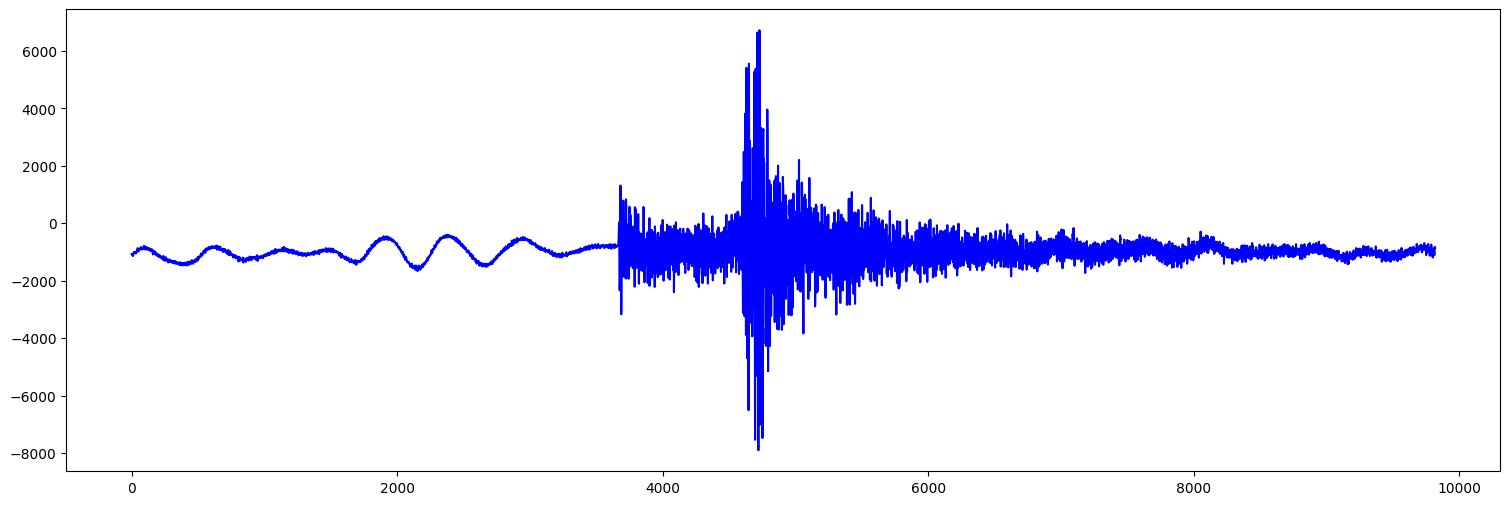

In [70]:
# visualize for good measure
time = [i for i in range(seismic_data.shape[0])]

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

plt.plot(time, seismic_data.T, 'b')

In [71]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [72]:
# put arrays in dictionary for labels
seis_data = {}

seis_data["channel_0"] = seismic_data.T

In [73]:
# warm up for 5 seconds and determine best lags
# (warms up in 9 seconds)
fftwarm = CPD.warm.FFTWarm(seis_data, n0=5, chunks=1)
fftwarm.warmup()

['channel_0']


In [74]:
import CPD.CPD
reload(CPD.CPD)

<module 'CPD.CPD' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\CPD.py'>

In [75]:
cpd_earth = CPD.CPD.Online(fftwarm, k=1, prob=0.8)

In [76]:
change_points = cpd_earth.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR cp = ???

STEP 5
STEP 6
STEP 7
STEP 8
STEP 9
STEP 10
STEP 11
STEP 12
STEP 13
STEP 14
STEP 15
STEP 16
STEP 17
STEP 18
STEP 19
STEP 20
STEP 21
STEP 22
STEP 23
STEP 24
STEP 25
STEP 26
STEP 27
STEP 28
channel_0 detected change point! Halting.
STEP 29
change point detected at t=3584


In [77]:
change_points

{'channel_0': 3584}

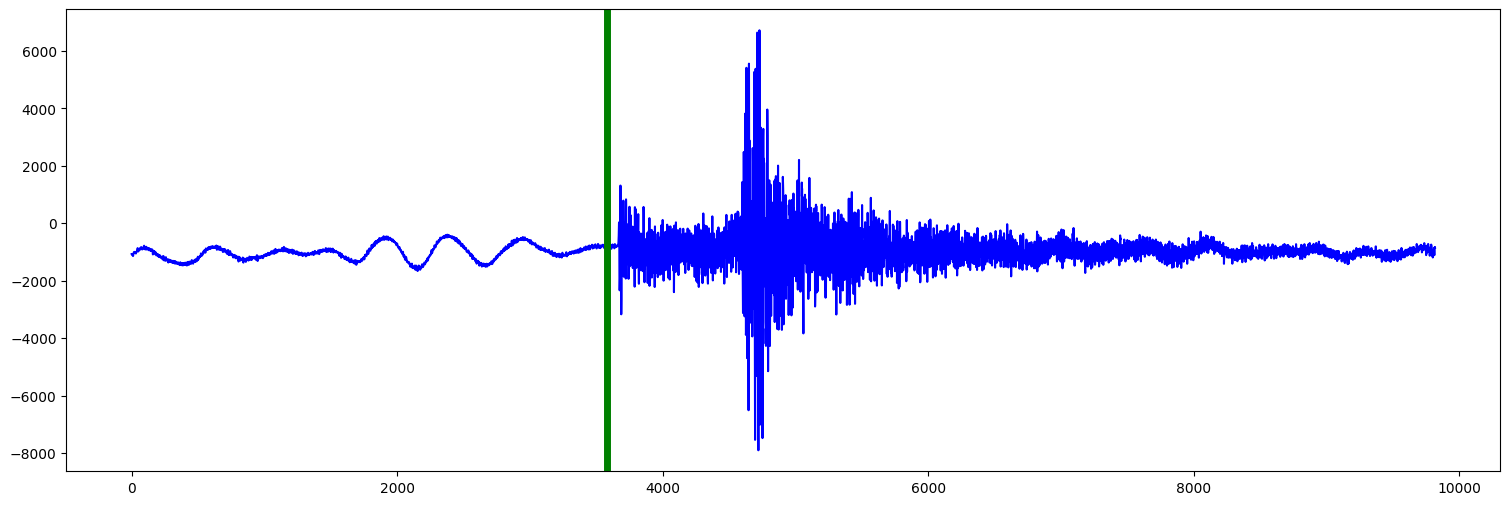

In [78]:
# visualize for good measure

warmup = 5 * 128

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

axs.plot(time, seismic_data.T, 'b')

cpt = change_points["channel_0"]
axs.axvline(x=cpt, c='g', linewidth=5)


['channel_0']


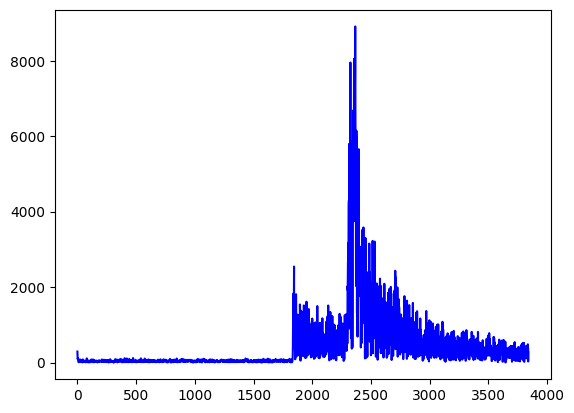

In [79]:
fftwarm = CPD.warm.FFTWarm(seis_data, n0=60, chunks=1)
fftwarm.warmup()

time = [i for i in range(fftwarm.saliency_maps["channel_0"].shape[0])]

plt.plot(time, fftwarm.saliency_maps["channel_0"], 'b')